# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Rahalsa Abi Umara]
- **Email:** [rahalsaabi.2022@student.uny.ac.id]
- **ID Dicoding:** [rahalsaabiumara]

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi konsentrasi PM10?
- Bagaimana hubungan antara TEMP (suhu), PRES (tekanan udara), DEWP (titik embun), dan RAIN (curah hujan)?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [59]:
df = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv", delimiter=",")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
- Data dikumpulkan dari sumber PRSA_Data_Wanshouxigong_20130301-20170228.csv
- df.head() digunakan untuk menampilkan 5 baris pertama


### Assessing Data

In [5]:
product_df = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")
product_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

**Insight:**
- cukup banyak missing value pada kolom PM2.5, PM10, SO2, NO2, CO, dan O3
- TEMP, PRES, DEWP, RAIN, dan WSPM memiliki sangat sedikit nilai yang hilang

### Cleaning Data

In [21]:
df = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")
df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear', limit_direction='forward')
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP       19
PRES       19
DEWP       19
RAIN       19
wd         79
WSPM       13
station     0
dtype: int64

**Insight:**
- Melakukan interpolasi pada kolom 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', dan 'O3'
- Pendekatan numerik yang digunakan untuk menghitung titik data baru berdasarkan range data yang sudah ada

## Exploratory Data Analysis (EDA)

### Explore ...

          PM2.5      PM10      TEMP      PRES      DEWP      RAIN      WSPM
PM2.5  1.000000  0.886600 -0.186009  0.033882  0.074067 -0.020685 -0.298390
PM10   0.886600  1.000000 -0.146458 -0.002947  0.041300 -0.033843 -0.230647
TEMP  -0.186009 -0.146458  1.000000 -0.828467  0.817473  0.039014  0.061509
PRES   0.033882 -0.002947 -0.828467  1.000000 -0.770016 -0.063378  0.053890
DEWP   0.074067  0.041300  0.817473 -0.770016  1.000000  0.088327 -0.278027
RAIN  -0.020685 -0.033843  0.039014 -0.063378  0.088327  1.000000  0.030903
WSPM  -0.298390 -0.230647  0.061509  0.053890 -0.278027  0.030903  1.000000


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35045.000000,35045.000000,35045.000000,35045.000000,34985,35051.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Wanshouxigong
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3568,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.067548,112.505795,17.363354,55.495402,1373.618569,55.919979,13.784477,1011.511804,2.707442,0.064320,NaN,1.745314,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.999698,98.132120,24.171627,35.833026,1228.161525,57.156365,11.385156,10.570928,13.704139,0.796981,NaN,1.206355,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.000000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.000000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.000000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,NaN,2.300000,NaN


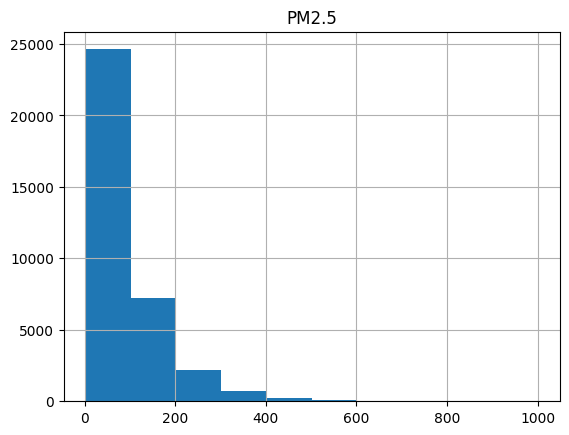

In [45]:
df.hist('PM2.5')
correlation_matrix = df[['PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
print(correlation_matrix)
df.describe(include="all")

**Insight:**
- Data pada kolom PM2.5 memiliki distribusi **right-skewed**
- Menunjukkan korelasi matrix 'PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi konsentrasi PM10?

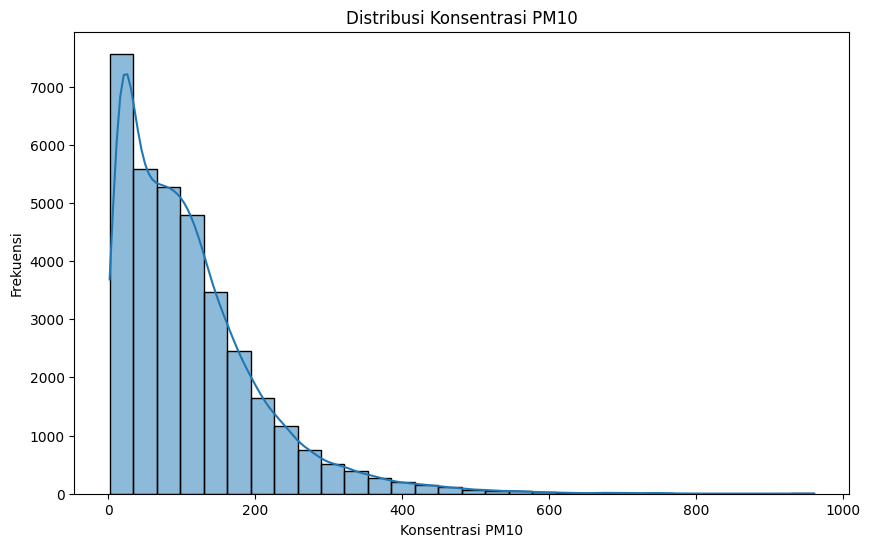

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(df['PM10'].dropna(), bins=30, kde=True)
plt.title('Distribusi Konsentrasi PM10')
plt.xlabel('Konsentrasi PM10')
plt.ylabel('Frekuensi')
plt.show()


### Pertanyaan 2: Bagaimana hubungan antara TEMP (suhu), PRES (tekanan udara), DEWP (titik embun), dan RAIN (curah hujan)?

In [56]:
korelasi_tpdr = df[['TEMP', 'PRES', 'DEWP', 'RAIN']].corr()
print(korelasi_tpdr)


          TEMP      PRES      DEWP      RAIN
TEMP  1.000000 -0.828467  0.817473  0.039014
PRES -0.828467  1.000000 -0.770016 -0.063378
DEWP  0.817473 -0.770016  1.000000  0.088327
RAIN  0.039014 -0.063378  0.088327  1.000000


**Insight:**
- Histogram untuk melihat distribusi PM10
- Nilai korelasi untuk memberikan hubungan linier antara TEMP, PRES, DEWP, dan RAIN

## Analisis Lanjutan (Opsional)

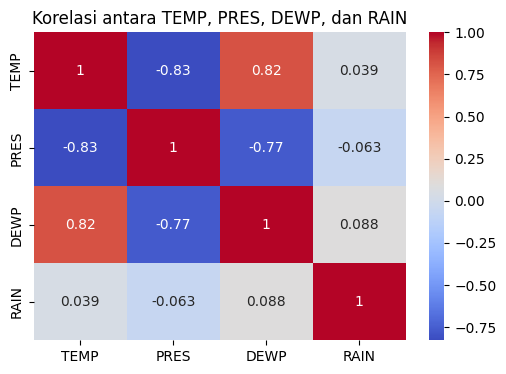

In [64]:
plt.figure(figsize=(6, 4))
sns.heatmap(korelasi_tpdr, annot=True, cmap='coolwarm')
plt.title('Korelasi antara TEMP, PRES, DEWP, dan RAIN')
plt.show()

## Conclusion

- Pertanyaan 1 : Terdapat kecenderungan beberapa nilai PM10 yang lebih tinggi, mengindikasikan adanya polusi udara yang signifikan pada saat-saat tertentu. 
- Pertanyaan 2 : Suhu (TEMP) memiliki korelasi positif dengan  titik embun (DEWP) yang menunjukkan bahwa ketika suhu meningkat, kelembapan juga meningkat, dan memiliki korelasi negatif dengan tekanan udara (PRES), dimana suhu yang lebih tinggi cenderung berhubungan dengan tekanan yang lebih rendah